### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [ ]:
head(ny)

In [ ]:
head(wash)

In [ ]:
head(chi)

### Question 1


**Your question 1 goes here.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

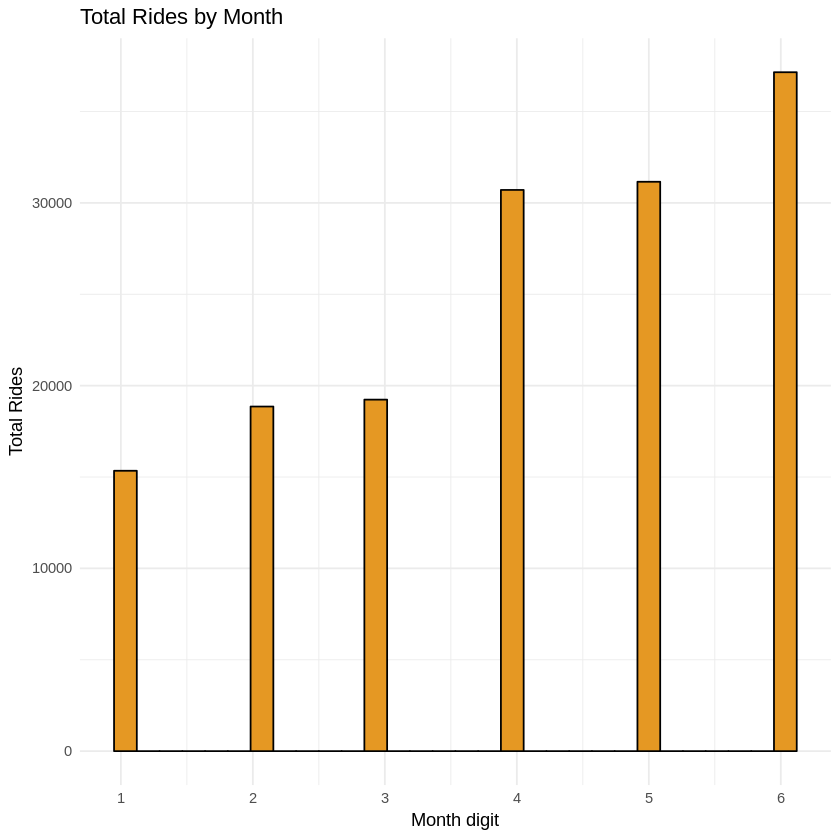

In [2]:
# What is the most common month?

all=wash
all=rbind(all,chi[,1:7])
all=rbind(all,ny[,1:7])

all$Start.Time=as.Date(all$Start.Time, format = "%Y-%m-%d")
all$Start.Time=as.numeric(strftime(all$Start.Time,"%m"))

library(ggplot2)
ggplot(aes(x = all$Start.Time), data = all) +
  geom_histogram(color = 'black', fill = '#E59823') +
  scale_x_continuous(breaks = seq(1, 6, 1)) +
  xlab('Month digit') +
  ylab('Total Rides') +
  ggtitle("Total Rides by Month") +
  theme_minimal()

In [ ]:
# The answer is that the month of june is the most common month (as it has the maximum number of occurrences)

**Summary of your question 1 results goes here.**

### Question 2

**Your question 2 goes here.**

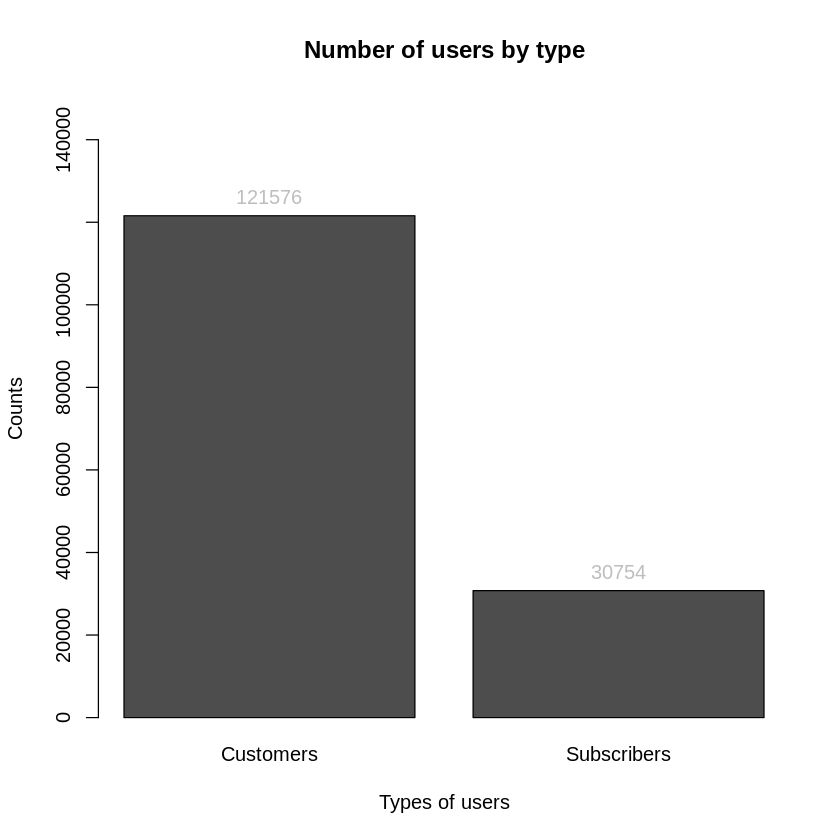

In [5]:
# What are the counts of each user type?

all=wash
all=rbind(all,chi[,1:7])
all=rbind(all,ny[,1:7])

getTotalUsersByType = function(dataset){
	customer=0
	subscriber=0
	for(type in dataset$User.Type){
		if(type=='Subscriber'){
			customer=customer+1
		} else if(type=='Customer'){
			subscriber=subscriber+1
		}
	}
	result=matrix(c(customer,subscriber),ncol=2,byrow=TRUE)
	colnames(result)=c("Customers","Subscribers")
	result=as.table(result)
    return(result)
}

typeCounts=getTotalUsersByType(all)

library(ggplot2)
barchart = barplot(typeCounts,
              ylim = c(0, 150000),
              xlab = "Types of users",
              ylab = "Counts",
              main = "Number of users by type")
text(x = barchart, y = typeCounts,
     label = typeCounts, pos = 3, col = "gray")

In [ ]:
# There are 121576 users from customer category and 30754 from subscriber category in the dataset

In [6]:
head(typeCounts)

  Customers Subscribers
A    121576       30754

**Summary of your question 2 results goes here.**

### Question 3

**Your question 3 goes here.**

In [7]:
# What are the counts of each gender (only available for NYC and Chicago)?

list=chi[,1:9]
list=rbind(list,ny[,1:9])
##list=subset(list, !is.na(list$Gender))

generateCountUserbyGender = function(dataset){
	male=0
	female=0
	for(gender in dataset$Gender){
		if(gender=='Male'){
			male=male+1
		} else if(gender=='Female'){
			female=female+1
		}
	}
    return(c(male,female))
}
print(generateCountUserbyGender(list))

[1] 42360 13882


In [ ]:
# It can be noted that we have 42360 males and 13882 females in the dataset.

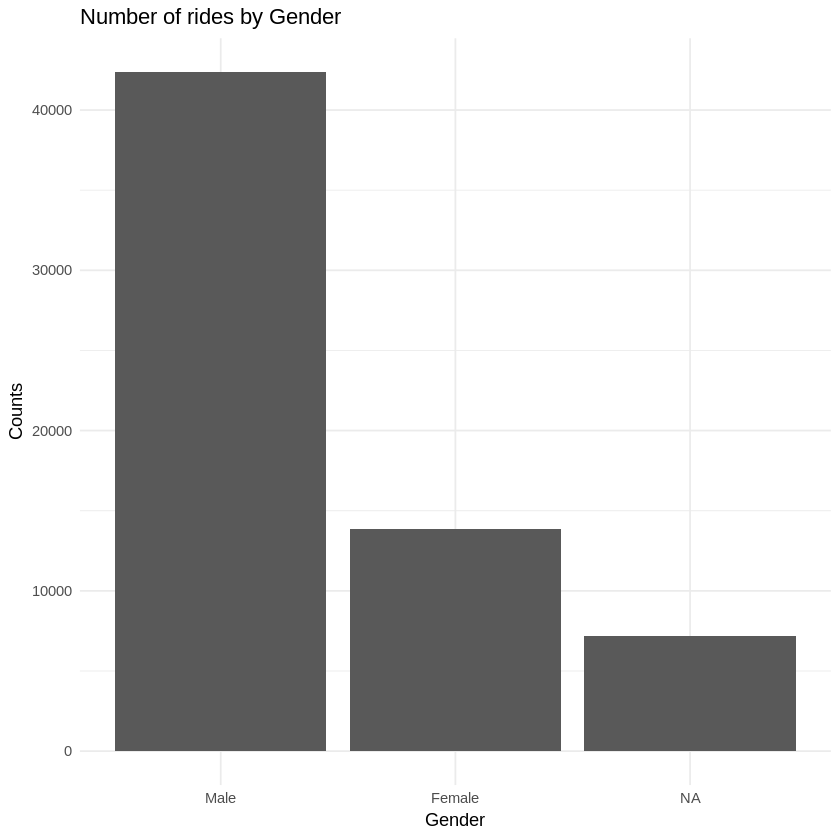

In [18]:
library(ggplot2)
ggplot(list, aes(list$Gender)) + 
  geom_bar() +
  xlab('Gender') +
  ylab('Counts') +
  ggtitle("Number of rides by Gender") +
  theme_minimal()

**Summary of your question 3 results goes here.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')